<h1 style="Comic Sans MS; text-align: center; color: #FFC300">Final Project</h1>
<h3 id="step1" style="font-family: Comic Sans MS; color: #68FF33">1. Exploratory Data Analysis</h3>
<p style="color: pink">The goals of the exploratory data analysis are:</p>
<ul style="color: pink">
    <li>to better understand the data,</li>
    <li>to evaluate if the given dataset is suitable for the K-Means clustering task.</li>
</ul>
<p style="color: pink">We need to:</p>
<ol style="color: pink">
    <li>Load the given Banknote authentication dataset.</li>
    <li>Calculate statistical measures, e.g. mean and standard deviation.</li>
    <li>Visualise the data as we consider fit.</li>
    <li>Evaluate if the given dataset is suitable for the K-Means clustering task.</li>
    <li>Write a short description of the dataset and our evaluation of its suitability for the K-Means clustering task.</li>
</ol>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [17]:
file_path = 'C:/Users/Jorge Payà/Desktop/4GeeksAcademy/DSML Bootcamp/KMeans-project/data/raw/Banknote-authentication-dataset.csv'
df = pd.read_csv(file_path)
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
dtypes: float64(2)
memory usage: 21.6 KB


(None,
         V1      V2
 0  3.62160  8.6661
 1  4.54590  8.1674
 2  3.86600 -2.6383
 3  3.45660  9.5228
 4  0.32924 -4.4552)

<p style="color: pink">The dataset contains 1,372 entries with two continuous numerical attributes: V1 (variance of Wavelet Transformed image) and V2 (skewness of Wavelet Transformed image). There are no missing values, and both columns are of type float64. Next, I'll compute statistical measures such as the mean and standard deviation.</p>

In [18]:
df.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


<p style="color: pink">The statistical summary shows:
<ul style="color: pink">
    <li>V1 (variance): Mean = 0.43, Std = 2.84, Range = [-7.04, 6.82]</li>
    <li>V2 (skewness): Mean = 1.92, Std = 5.87, Range = [-13.77, 12.95]</li>
</ul>
<p style="color: pink">Both attributes have a wide range and significant variability, which suggests that clustering might be feasible. Now, I'll visualize the data to assess its distribution and potential clustering patterns.</p>

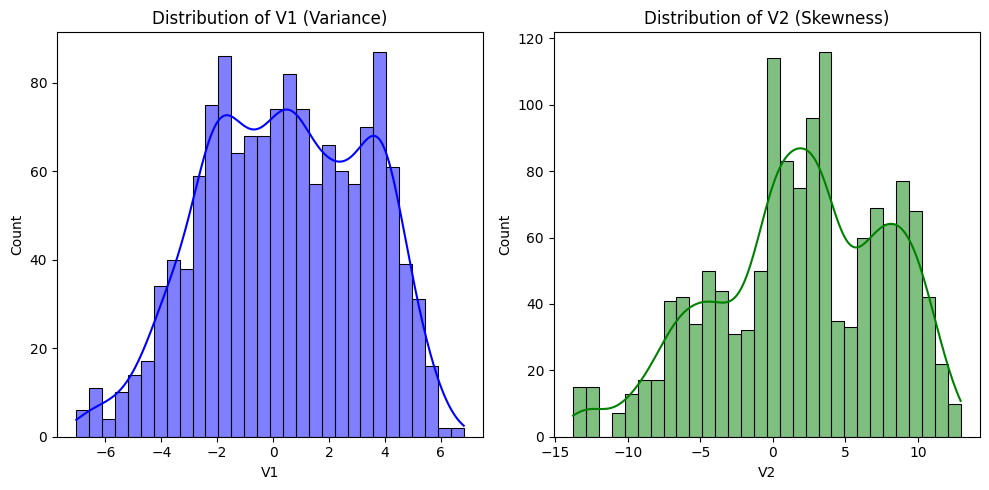

In [19]:
plt.figure(figsize=(10, 5))
# Histogram for V1
plt.subplot(1, 2, 1) # (rows, columns, panel number)
sns.histplot(df['V1'], bins=30, color='blue', kde=True) # kde = kernel density estimation
plt.title('Distribution of V1 (Variance)')

# Histogram for V2
plt.subplot(1, 2, 2)
sns.histplot(df['V2'], bins=30, color='green', kde=True)
plt.title('Distribution of V2 (Skewness)')

plt.tight_layout()
plt.show()

<p style="color: pink">The histograms show that V1 (variance) has a roughly symmetric distribution, while V2 (skewness) is more spread out with noticeable peaks. Next, I'll create a scatter plot to examine if the data naturally forms cluster.</p>

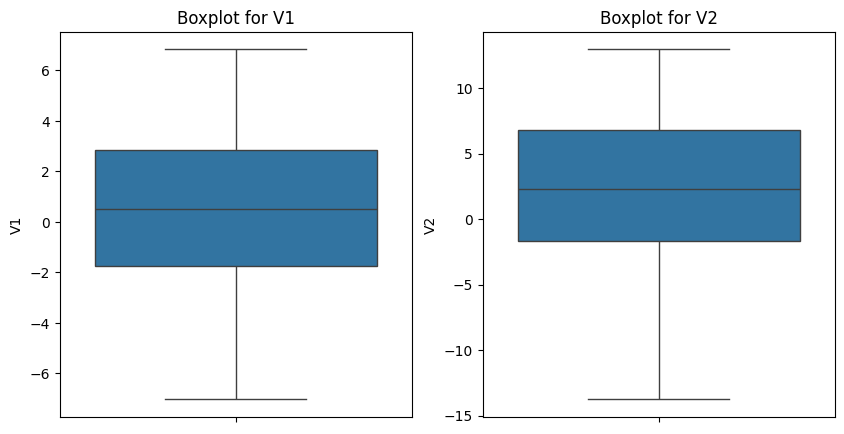

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['V1'])
plt.title('Boxplot for V1')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['V2'])
plt.title('Boxplot for V2')
plt.show()

In [21]:
# The boxplot shows that there are no outliers in the data, but let's confirm it using z-scores:
z_scores = np.abs(zscore(df[['V1', 'V2']]))
outliers = (z_scores > 3).any(axis=1)
print(f'Number of outliers: {outliers.sum()}')

Number of outliers: 0


<p style="color: pink">K-Means is sensitive to scale. Since V1 and V2 have different ranges and standard deviations, I will scale them</p>

In [23]:
features = ['V1', 'V2']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h3 id="step1" style="font-family: Comic Sans MS; color: #68FF33">2. Determine Optimal Number of Clusters (k)</h3>
<p style="color: pink">Now we determine the optimal number of clusters using the elbow method which consists of computing the sum of squared distances (inertia) for different k values and plotting an elbow curve.</p>

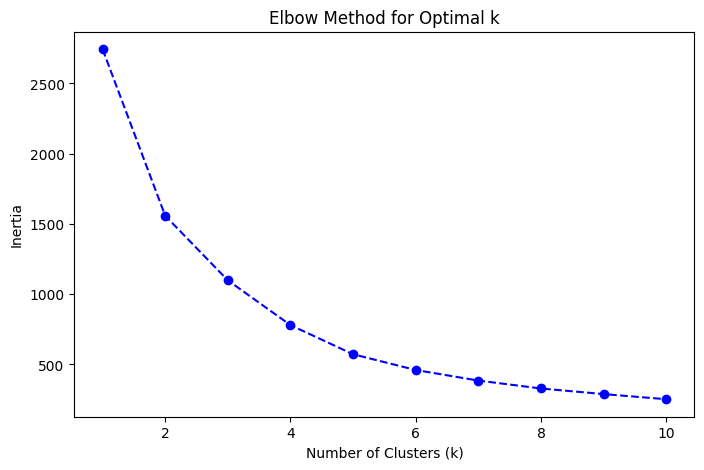

In [ ]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', color='blue', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

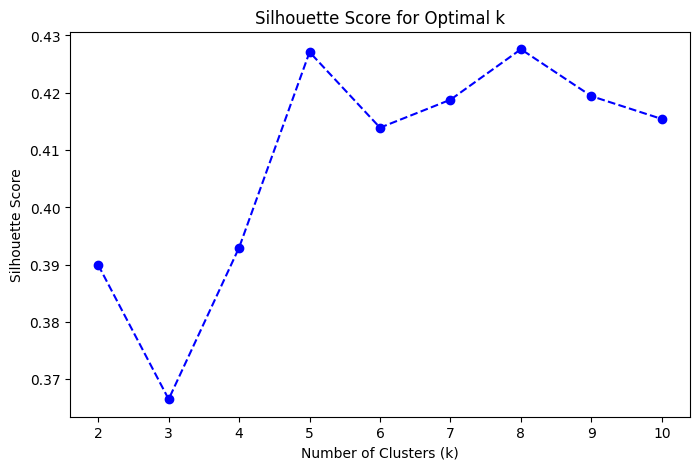

In [ ]:
# We also want to use silhouette score to confirm the optimal number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='blue', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

In [24]:
# Print the silhouette scores
for k, score in zip(range(2, 11), silhouette_scores):
    print(f'Silhouette score for k={k}: {score}')


Silhouette score for k=2: 0.38994942549060074
Silhouette score for k=3: 0.36653997314222025
Silhouette score for k=4: 0.3929946049533034
Silhouette score for k=5: 0.42709261414672167
Silhouette score for k=6: 0.4139091845327554
Silhouette score for k=7: 0.41878955497659853
Silhouette score for k=8: 0.4275959982970231
Silhouette score for k=9: 0.41941137689706515
Silhouette score for k=10: 0.41542273184014505


<p style="color: pink">Silhouette Score evaluates how well data points fit within their assigned clusters. Ranges from -1 to 1 (higher = better clustering):
<ul style="color: pink">
<li> >0.5 → Clear clustering structure.</li>
<li>0.2 - 0.5 → Some overlap but still valid.</li>
<li>  >0.2 → Poor separation, reconsider clustering method.</li>
</ul></p>

<h3 id="step1" style="font-family: Comic Sans MS; color: #68FF33">3. Clustering</h3>
<p style="color: pink">The goal of this assignment is to use the Banknote authentication dataset to train a model that can predict if a banknote is genuine or not, steps are:</p>
<ol style="color: pink">
    <li>run K-means on the given dataset</li>
    <li>visualise the results.</li>
    <li>re-run K-means several times and visualise the results. </li>
    <li>compare the results: is the K-means algorithm stable?</li>
    <li>describe the results.</li>
</ol>
<p style="color: pink">Based on the silhouette scores, the highest value is at k=8 (0.4276), followed closely by k=5 (0.4271). These values suggest that k=8 and k=5 are the best candidates for clustering. Since KMeans uses random initialization for cluster centroid we need to run it multiple times with different initializations (random seeds) to check whether the clustering results remain consistent. Below we run KMeans 10 multiple times (10 runs) with different random seeds for k=5 and k=8, measuring centroid variability to assess cluster stability.</p>

Evaluating stability for k=5
Average centroid variability for k=5: 4.207429245134921


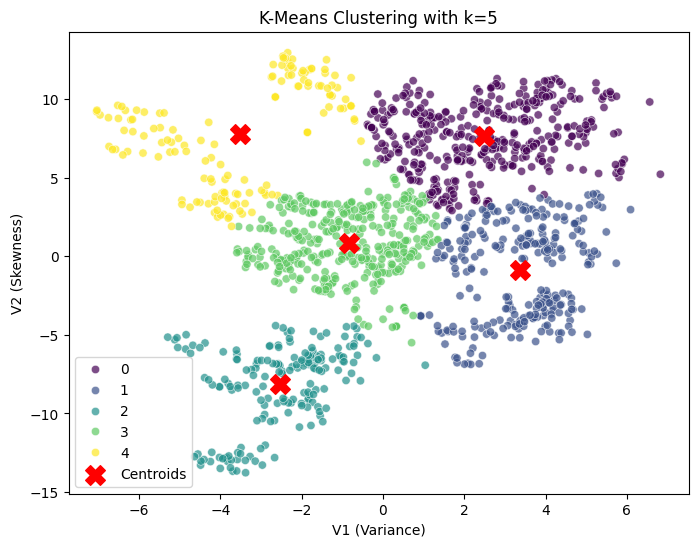

Cluster centroids for k=5: [[ 0.72107857  0.97349834]
 [ 1.03401015 -0.48011317]
 [-1.0419044  -1.71422944]
 [-0.44411883 -0.18542554]
 [-1.38937451  0.99573736]]
Evaluating stability for k=8
Average centroid variability for k=8: 5.890349556853293


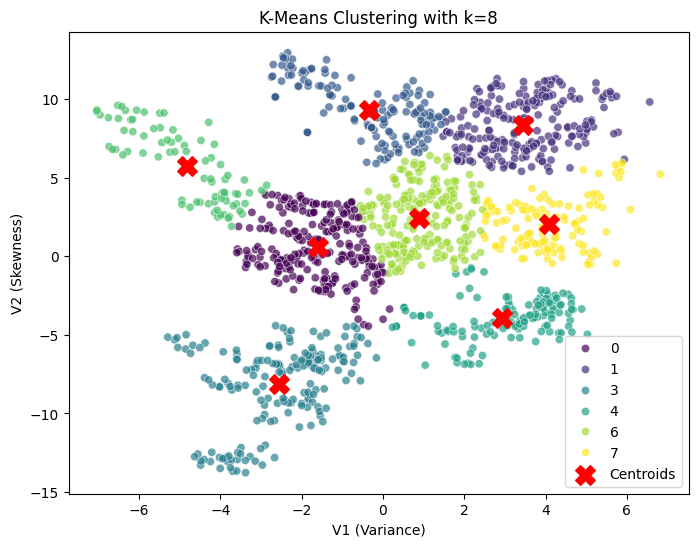

Cluster centroids for k=8: [[-0.71870507 -0.22800739]
 [ 1.05819195  1.09283136]
 [-0.27295277  1.26169988]
 [-1.04872641 -1.71534363]
 [ 0.87621543 -0.99786682]
 [-1.85141205  0.65321648]
 [ 0.16055636  0.08635158]
 [ 1.28305533  0.01870606]]


In [26]:
# Apply K-Means with k=5 and k=8 for stability testing
for k_optimal in [5, 8]:
    print(f"Evaluating stability for k={k_optimal}")
    centroid_variability = []
    num_runs = 10
    centroids_list = []
    
    for i in range(num_runs):
        kmeans = KMeans(n_clusters=k_optimal, random_state=i, n_init=10)
        labels = kmeans.fit_predict(X_scaled)
        centroids_list.append(kmeans.cluster_centers_)
        
        if i > 0:
            variability = np.linalg.norm(centroids_list[i] - centroids_list[i-1])
            centroid_variability.append(variability)
    
    avg_variability = np.mean(centroid_variability)
    print(f"Average centroid variability for k={k_optimal}: {avg_variability}")
    
    # Apply K-Means with a fixed random state for visualization
    kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
    df[f'Cluster_k{k_optimal}'] = kmeans.fit_predict(X_scaled)
    
    # Visualize Clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['V1'], y=df['V2'], hue=df[f'Cluster_k{k_optimal}'], palette='viridis', alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
                kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
                marker='X', s=200, color='red', label='Centroids')
    plt.xlabel('V1 (Variance)')
    plt.ylabel('V2 (Skewness)')
    plt.title(f'K-Means Clustering with k={k_optimal}')
    plt.legend()
    plt.show()

    # Print cluster centroids
    print(f"Cluster centroids for k={k_optimal}:", kmeans.cluster_centers_)


<p style="color: pink">The centroid variability values indicate that clustering is not entirely stable, with k=8 showing higher variability than k=5. This suggests that different runs of KMeans produce significantly different cluster centers, especially when k=8, which may indicate an over-segmentation of the data. How to interpret this:</p>
<ol style="color: pink">
    <li>Lower variability (k=5, ~4.2): The clustering is relatively stable. Re-running the algorithm with different initializations produces similar centroids.</li>
    <li>Higher variability (k=8, ~5.89): The clustering is more sensitive to initialization, meaning centroids shift more across runs. This might indicate that k=8 is forcing too many clusters.</li>
</ol>